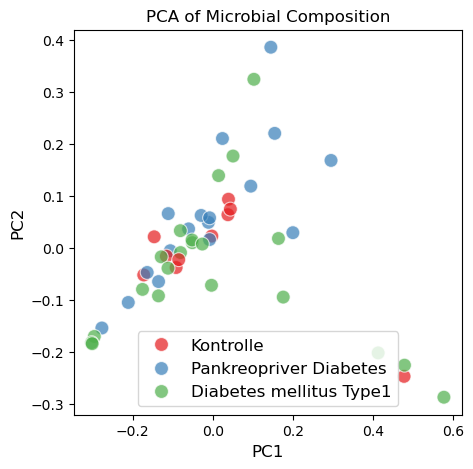

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Load the dataset
file_path = "level-6.csv"
df = pd.read_csv(file_path)
df["condition"].replace("Diabetes mellitus Typ1", "Diabetes mellitus Type1",inplace=True)
df["condition"].replace("pankreopriver Diabetes", "Pankreopriver Diabetes",inplace=True)
# Extract metadata and microbial abundance data
metadata_cols = ["index", "sample_information", "condition", "nikotin", "sex", "age_group", "AH"]
microbial_data = df.drop(columns=metadata_cols, errors='ignore')

# Extract only microbial taxa names (last part of taxonomy string)
def extract_species_name(taxonomy):
    """Extract the last part of a taxonomy string (genus name)."""
    return taxonomy.split(';')[-1].strip()

microbial_data.rename(columns={col: extract_species_name(col) for col in microbial_data.columns}, inplace=True)

# Normalize microbial abundances (convert to relative abundance)
microbial_data = microbial_data.div(microbial_data.sum(axis=1), axis=0)

# Add condition column back for grouping
microbial_data["condition"] = df["condition"]


# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(microbial_data.drop(columns=["condition"], errors='ignore'))

# Create PCA DataFrame for visualization
pca_df = pd.DataFrame(pca_result, columns=["PC1", "PC2"])
pca_df["condition"] = df["condition"]


# Plot PCA results
plt.figure(figsize=(5, 5))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="condition", palette="Set1", alpha=0.7, s=100)
plt.xlabel("PC1",fontsize= 12)
plt.ylabel("PC2",fontsize= 12)
plt.title("PCA of Microbial Composition")
plt.legend(title="", fontsize= 12)
plt.savefig("pca.svg")
plt.show()


In [77]:
df.columns

Index(['index',
       'Bacteria;Firmicutes;Clostridia;Lachnospirales;Lachnospiraceae;',
       'Bacteria;Firmicutes;Clostridia;Oscillospirales;UCG-010;',
       'Bacteria;Proteobacteria;Gammaproteobacteria;Enterobacterales;Pasteurellaceae;Aggregatibacter',
       'Bacteria;Firmicutes;Clostridia;Lachnospirales;Lachnospiraceae;Lachnospiraceae UCG-004',
       'Bacteria;Actinobacteriota;Coriobacteriia;Coriobacteriales;Atopobiaceae;Olsenella',
       'Bacteria;Firmicutes;Clostridia;Lachnospirales;Lachnospiraceae;Lachnospiraceae NC2004 group',
       'Bacteria;Firmicutes;Clostridia;;;',
       'Bacteria;Firmicutes;Clostridia;Oscillospirales;Ruminococcaceae;Subdoligranulum',
       'Bacteria;Bacteroidota;Bacteroidia;Bacteroidales;Porphyromonadaceae;',
       ...
       'Bacteria;Firmicutes;Clostridia;Oscillospirales;Ethanoligenenaceae;Acetanaerobacterium',
       'Bacteria;Firmicutes;Clostridia;Lachnospirales;Lachnospiraceae;Oribacterium',
       'Bacteria;Firmicutes;Clostridia;Peptostrepto

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "level-6.csv"
df = pd.read_csv(file_path)

# Extract microbial abundance data (exclude metadata)
metadata_cols = ["index", "sample_information", "condition", "nikotin", "sex", "age_group", "AH"]
microbial_data = df.drop(columns=metadata_cols, errors='ignore')

# Extract only microbial taxa names (last part of taxonomy string)
def extract_species_name(taxonomy):
    """Extract the last part of a taxonomy string (genus name)."""
    return taxonomy.split(';')[-1].strip()

microbial_data.rename(columns={col: extract_species_name(col) for col in microbial_data.columns}, inplace=True)

# Normalize microbial abundances (convert to relative abundance)
microbial_data = microbial_data.div(microbial_data.sum(axis=1), axis=0)

# Add condition column back for grouping
microbial_data["condition"] = df["condition"]

# Compute mean abundance for each bacterial taxa per condition
condition_means = microbial_data.groupby("condition").mean()
top_bacteria = 
# Filter dataset for the selected taxa
heatmap_data = condition_means[top_bacteria]

# Plot heatmap
plt.figure(figsize=(4, 6))
sns.heatmap(heatmap_data.T, cmap="coolwarm", annot=False, linewidths=0.5)

# Labels and title
plt.title("Top 20 Differentially Abundant Bacteria Across Conditions")
plt.xlabel("Condition")
plt.ylabel("Bacterial Genus")
plt.xticks(rotation=90)
plt.yticks(rotation=0)

# Show plot
plt.show()


In [66]:
# Load the dataset
file_path = "level-6.csv"
df = pd.read_csv(file_path)


In [67]:
# Extract microbial abundance data (exclude metadata)
metadata_cols = ["index", "sample_information", "condition", "nikotin", "sex", "age_group", "AH"]
microbial_data = df.drop(columns=metadata_cols, errors='ignore')

In [68]:
# Extract only microbial taxa names (last part of taxonomy string)
def extract_species_name(taxonomy):
    """Extract the last part of a taxonomy string (genus name)."""
    return taxonomy.split(';')[-1].strip()

In [69]:
microbial_data.rename(columns={col: extract_species_name(col) for col in microbial_data.columns}, inplace=True)
microbial_data = microbial_data.loc[:, microbial_data.columns != ""]  # Remove empty column names

In [70]:
# Normalize microbial abundances (relative)
microbial_data = microbial_data.div(microbial_data.sum(axis=1), axis=0)

# Add condition column back
microbial_data["condition"] = df["condition"]

In [71]:
# Define the taxon of interest
taxon = "Akkermansia"

/tmp/ipykernel_883223/4048304958.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=microbial_data["condition"], y=microbial_data[taxon], palette=custom_palette, ax=ax)
/tmp/ipykernel_883223/4048304958.py:69: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


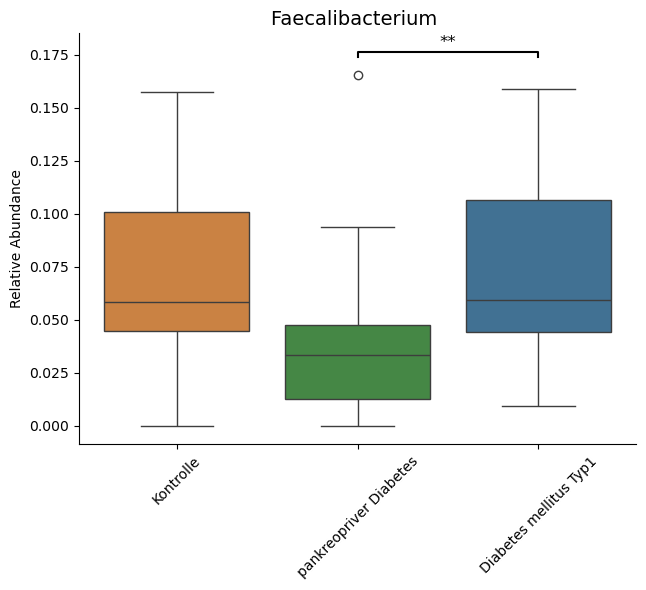

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu

# Load the dataset
file_path = "level-6.csv"
df = pd.read_csv(file_path)

# Extract microbial abundance data (exclude metadata)
metadata_cols = ["index", "sample_information", "condition", "nikotin", "sex", "age_group", "AH"]
microbial_data = df.drop(columns=metadata_cols, errors='ignore')

# Extract only microbial taxa names (last part of taxonomy string)
def extract_species_name(taxonomy):
    """Extract the last part of a taxonomy string (genus name)."""
    return taxonomy.split(';')[-1].strip()

microbial_data.rename(columns={col: extract_species_name(col) for col in microbial_data.columns}, inplace=True)

# Remove empty column names ("")
microbial_data = microbial_data.loc[:, microbial_data.columns != ""]

# Normalize microbial abundances (convert to relative abundance)
microbial_data = microbial_data.div(microbial_data.sum(axis=1), axis=0)

# Add condition column back for grouping
microbial_data["condition"] = df["condition"]

# Define key taxa related to insulin loss
protective_taxa = ["Faecalibacterium"]#, "Akkermansia", "Roseburia", "Bifidobacterium", "Lactobacillus"]
#pathogenic_taxa = ["Bacteroides", "Desulfovibrio", "Ruminococcus"]
all_taxa = protective_taxa #+ pathogenic_taxa

# Define condition colors
custom_palette = {"Diabetes mellitus Typ1": "#3374A1", "Kontrolle": "#E1812C", "pankreopriver Diabetes": "#3A923A"}

# Define condition groups for statistical comparisons
pairs = [ ("Kontrolle", "Diabetes mellitus Typ1"),("Kontrolle", "pankreopriver Diabetes"),("pankreopriver Diabetes","Diabetes mellitus Typ1")]

# Function to compute p-values
def compute_pval(data, taxon, group1, group2):
    """Compute Mann-Whitney U test p-value between two groups."""
    x = data[data["condition"] == group1][taxon]
    y = data[data["condition"] == group2][taxon]
    
    if len(x) > 0 and len(y) > 0:
        stat, p = mannwhitneyu(x, y, alternative="two-sided")
        return p
    else:
        return None

# Set up subplots (3 plots per row)
n_taxa = len(all_taxa)
n_cols = 3
n_rows = (n_taxa // n_cols) + (n_taxa % n_cols > 0)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 6 * n_rows))
axes = axes.flatten()

# Generate boxplots with only statistical significance stars
for i, taxon in enumerate(all_taxa):
    if taxon in microbial_data.columns:
        ax = axes[i]
        sns.boxplot(x=microbial_data["condition"], y=microbial_data[taxon], palette=custom_palette, ax=ax)
        ax.set_title(f"{taxon} ", fontsize=14)
        ax.set_xlabel("")
        ax.set_ylabel("Relative Abundance")
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

        # Remove plot frame
        sns.despine(ax=ax)

        y_max = microbial_data[taxon].max()
        height = y_max * 0.05  # Vertical spacing for the bars
        bar_height = height * 0.3  # Height of the bar itself
        current_y = y_max + height
        
        for j, (g1, g2) in enumerate(pairs):
            pval = compute_pval(microbial_data, taxon, g1, g2)
            if pval is not None and pval < 0.05:
                # Determine significance level
                if pval < 0.001:
                    significance = '***'
                elif pval < 0.01:
                    significance = '**'
                else:
                    significance = '*'

                # Get x positions
                groups = microbial_data["condition"].unique().tolist()
                try:
                    x1 = groups.index(g1)
                    x2 = groups.index(g2)
                except ValueError:
                    continue  # Skip if group not in current data

                # Draw the bar
                ax.plot([x1, x1, x2, x2], [current_y, current_y + bar_height, current_y + bar_height, current_y],
                        lw=1.5, color='black')
                # Add the significance star
                ax.text((x1 + x2) / 2, current_y + bar_height + (height * 0.1), significance,
                        ha='center', va='bottom', fontsize=12)
                
                current_y += height  # Increase y for next bar (if any)
#
# Remove empty subplots
for i in range(len(all_taxa), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout and show
plt.tight_layout()
plt.show()


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

In [81]:
import pandas as pd

# Load the dataset
file_path = "level-6.csv"
df = pd.read_csv(file_path)

# Define metadata columns
metadata_cols = ["index", "sample_information", "condition", "nikotin", "sex", "age_group", "AH"]

# Function to extract and clean microbial data by condition
def extract_microbial_data(df, condition_label):
    subset = df[df["sample_information"].str.startswith(condition_label)]
    microbial_data = subset.drop(columns=metadata_cols, errors='ignore')
    microbial_data = microbial_data.loc[:, (microbial_data != 0).any(axis=0)]
    return microbial_data

# Create three microbial datasets
microbial_data_PDM = extract_microbial_data(df, "PDM")
microbial_data_DM = extract_microbial_data(df, "DM")
microbial_data_Kontrolle = extract_microbial_data(df, "K")


In [82]:
# Extract microbial abundance data (exclude metadata)
list_PDM = set(microbial_data_PDM.columns)
list_DM= set(microbial_data_DM.columns)
list_Kontrolle = set(microbial_data_Kontrolle.columns)

In [88]:
common_PDM_DM = list_PDM- list_DM

# Unique to PDM
unique_PDM = list_PDM - lbist_DM - list_Kontrolle

# Unique to DM
unique_DM = list_DM - list_PDM - list_Kontrolle

# If you want to convert them to sorted lists for display or export:
common_PDM_DM = sorted(list(common_PDM_DM))
unique_PDM = sorted(list(unique_PDM))
unique_DM = sorted(list(unique_DM))

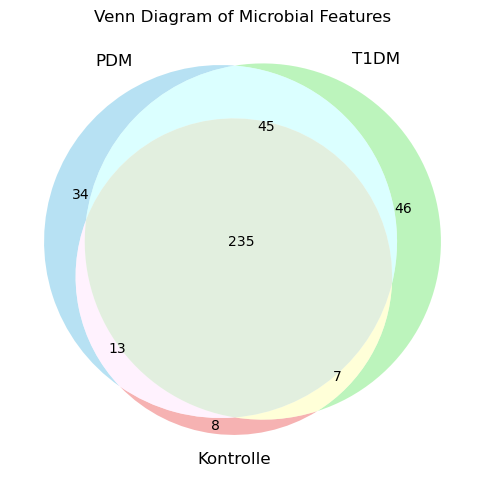

In [33]:
from matplotlib_venn import venn3
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))

# Example: set colors and alpha for clarity
venn = venn3([set(list_PDM), set(list_DM), set(list_Kontrolle)],
             set_labels=("PDM", "T1DM", "Kontrolle"),
             set_colors=("skyblue", "lightgreen", "lightcoral"),
             alpha=0.6)

plt.title("Venn Diagram of Microbial Features")


plt.show()


/home/kvalem/.conda/envs/scanpy/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/kvalem/.conda/envs/scanpy/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/kvalem/.conda/envs/scanpy/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/kvalem/.conda/envs/scanpy/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using defau

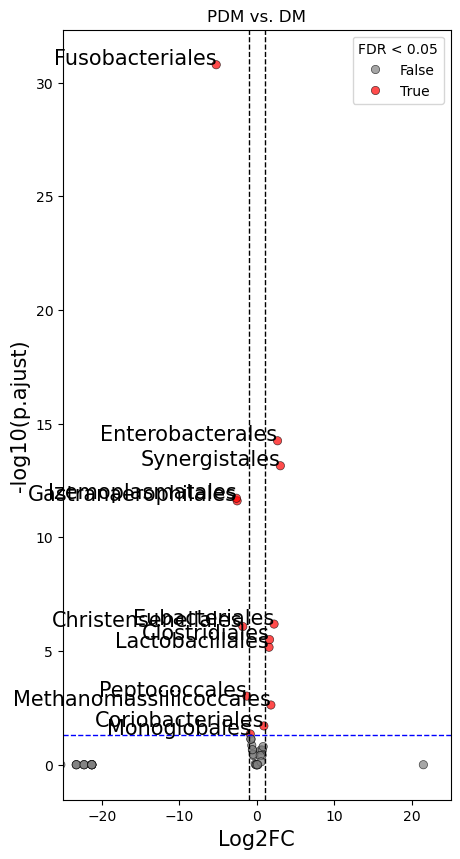

In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import mannwhitneyu
from statsmodels.stats.multitest import multipletests

# Define the file path
file_path = "level-4.csv"

# Load the CSV file
df = pd.read_csv(file_path)

# Extract microbial abundance data (exclude metadata)
metadata_cols = ["index", "sample_information", "condition", "nikotin", "sex", "age_group", "AH"]
microbial_data = df.drop(columns=metadata_cols, errors='ignore')

# Extract only microbial taxa names (last part of taxonomy string)
def extract_species_name(taxonomy):
    """Extract the last part of a taxonomy string (genus name)."""
    return taxonomy.split(';')[-1].strip()

microbial_data.rename(columns={col: extract_species_name(col) for col in microbial_data.columns}, inplace=True)

# Remove empty column names ("")
microbial_data = microbial_data.loc[:, microbial_data.columns != ""]

# Add condition column back
microbial_data["condition"] = df["condition"]

# Filter for only "pankreopriver Diabetes" and "Kontrolle"
df_filtered = microbial_data[microbial_data["condition"].isin(["pankreopriver Diabetes", "Diabetes mellitus Typ1"])].copy()

# Convert condition to binary (1 = PDM, 0 = Kontrolle)
df_filtered["condition"] = df_filtered["condition"].map({"pankreopriver Diabetes": 1, "Diabetes mellitus Typ1": 0})

# Prepare results storage
results = []

# Perform differential abundance analysis (negative binomial regression like DESeq2)
for taxon in df_filtered.columns[:-1]:  # Exclude 'condition' column
    # Ensure values are numeric
    df_filtered[taxon] = pd.to_numeric(df_filtered[taxon], errors='coerce')

    # Fit a Negative Binomial Model
    try:
        model = smf.glm(f"{taxon} ~ condition", data=df_filtered, family=sm.families.NegativeBinomial()).fit()
        log_fold_change = model.params["condition"]
        p_value = model.pvalues["condition"]
        results.append((taxon, log_fold_change, p_value))
    except:
        continue  # Skip taxa where model fitting fails

# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=["Taxon", "Log2 Fold Change", "p-value"])

# Adjust p-values using Benjamini-Hochberg (FDR correction)
results_df["Adjusted p-value"] = multipletests(results_df["p-value"], method="fdr_bh")[1]

# Create a Volcano Plot to visualize differential abundance results

# Define significance threshold
significance_threshold = 0.05

# Create a new column for significance labeling
results_df["Significance"] = results_df["Adjusted p-value"] < significance_threshold

# Create Volcano Plot
plt.figure(figsize=(5,10))
sns.scatterplot(
    x=results_df["Log2 Fold Change"],
    y=-np.log10(results_df["Adjusted p-value"]),
    hue=results_df["Significance"],
    palette={True: "red", False: "gray"},
    edgecolor="black",
    alpha=0.7
)

# Add labels for significant points
for i, row in results_df.iterrows():
    if row["Significance"]:
        plt.text(row["Log2 Fold Change"], -np.log10(row["Adjusted p-value"]), row["Taxon"], fontsize=15, ha='right')


logfoldchange_threshold= 1
# Labels and title
plt.axhline(-np.log10(significance_threshold), linestyle="--", color="blue", linewidth=1)  # Threshold line
plt.axvline(x=-logfoldchange_threshold, linestyle="--", color="black", linewidth=1)  # Log2FC negative threshold
plt.axvline(x=logfoldchange_threshold, linestyle="--", color="black", linewidth=1)  # Log2FC positive threshold
plt.xlabel("Log2FC",fontsize=15, )
plt.ylabel("-log10(p.ajust)",fontsize=15, )
plt.title("PDM vs. DM")
plt.legend(title="FDR < 0.05", loc="upper right")
plt.xlim(-25, 25)
#plt.savefig("volcano_pdm_dn.svg")
# Show plot
plt.show()


In [48]:
from sklearn.datasets import load_iris

# Load the dataset
iris = load_iris()

In [117]:
import pandas as pd

# Extract the data
data = pd.DataFrame(iris['data'], columns=iris['feature_names'])
# Extract the target
target = pd.DataFrame(iris['target'], columns=['species'])
# Translate the target
class2species = dict(enumerate(iris['target_names']))
target['species'] = target['species'].replace(class2species)
# Combine into one dataset
df = pd.concat([target, data], axis='columns')

In [123]:
col = 'petal length (cm)'
data = [
    df[df['species'] == 'setosa'][col],
    df[df['species'] == 'versicolor'][col],
    df[df['species'] == 'virginica'][col],
]

In [131]:
subset = microbial_data[["condition", "Faecalibacterium"]]


In [148]:
xticklabels = microbial_data['condition'].unique()
xticklabels = [label.title() for label in xticklabels]
ax.set_xticklabels(xticklabels)

[Text(1, 0, 'Kontrolle'),
 Text(2, 0, 'Pankreopriver Diabetes'),
 Text(3, 0, 'Diabetes Mellitus Typ1')]

In [ ]:
protective_taxa = ["Faecalibacterium"]#, "Akkermansia", "Roseburia", "Bifidobacterium", "Lactobacillus"]
#pathogenic_taxa = ["Bacteroides", "Desulfovibrio", "Ruminococcus"]

Significant comparisons: [[(1, 3), 0.18701701393562942], [(1, 2), 0.11324654353341654], [(2, 3), 0.7064463383985746]]


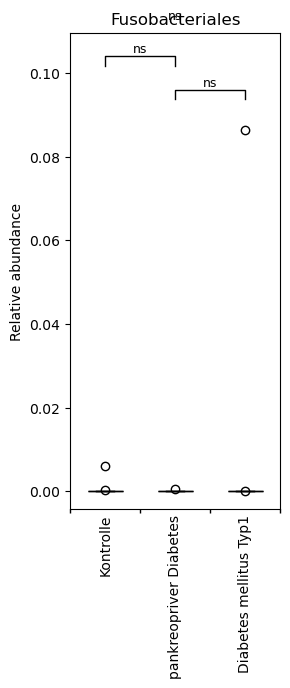

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
# Target taxon
col = "Fusobacteriales"

# Load the dataset
file_path = "level-4.csv"
df = pd.read_csv(file_path)

# Extract microbial abundance data (exclude metadata)
metadata_cols = ["index", "sample_information", "condition", "nikotin", "sex", "age_group", "AH"]
microbial_data = df.drop(columns=metadata_cols, errors='ignore')

# Extract only microbial taxa names (last part of taxonomy string)
def extract_species_name(taxonomy):
    return taxonomy.split(';')[-1].strip()

microbial_data.rename(columns={col: extract_species_name(col) for col in microbial_data.columns}, inplace=True)
microbial_data = microbial_data.loc[:, microbial_data.columns != ""]  # Remove empty column names

# Normalize microbial abundances (relative)
microbial_data = microbial_data.div(microbial_data.sum(axis=1), axis=0)

# Add condition column back
microbial_data["condition"] = df["condition"]

# Define custom palette
custom_palette = {
    "Diabetes mellitus Typ1": "#3374A1",
    "Kontrolle": "#E1812C",
    "pankreopriver Diabetes": "#3A923A"
}


# Define condition order (ensure consistent mapping)
conditions_in_order = ['Kontrolle', 'pankreopriver Diabetes', 'Diabetes mellitus Typ1']

# Prepare data for boxplot
data = [microbial_data[microbial_data['condition'] == cond][col] for cond in conditions_in_order]

# Initialise a list of combinations of groups that are significantly different
significant_combinations = []

# Generate all combinations for significance testing
ls = list(range(1, len(data) + 1))
combinations = [(ls[x], ls[x + y]) for y in reversed(ls) for x in range((len(ls) - y))]

for combination in combinations:
    data1 = data[combination[0] - 1]
    data2 = data[combination[1] - 1]
    U, p = stats.mannwhitneyu(data1, data2, alternative='two-sided')
    if p < 5:
        significant_combinations.append([combination, p])

print("Significant comparisons:", significant_combinations)

# Create plot
fig, ax = plt.subplots(figsize=(3, 7))

# Create boxplot
bp = ax.boxplot(data, widths=0.5, patch_artist=True)

# Y-axis label
ax.set_ylabel('Relative abundance')

# Set custom x-tick labels
ax.set_xticklabels(conditions_in_order)
ax.tick_params(axis='x', which='major', length=0)

# Add minor ticks for cleaner look
xticks = [0.5] + [x + 0.5 for x in ax.get_xticks()]
ax.set_xticks(xticks, minor=True)
ax.tick_params(axis='x', which='minor', length=3, width=1)

# Apply custom colors
colors = [custom_palette[cond] for cond in conditions_in_order]
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# Median line color
plt.setp(bp['medians'], color='k')
plt.xticks(rotation=90)
plt.title(col)
# Set up for significance bars
bottom, top = ax.get_ylim()
y_range = top - bottom

# Adjust ylim to ensure space for annotations
extra_space = y_range * 0.2
ax.set_ylim(top=top + extra_space)
y_range = ax.get_ylim()[1] - ax.get_ylim()[0]  # Recompute after ylim adjustment

# Draw significance bars
for i, significant_combination in enumerate(significant_combinations):
    x1, x2 = significant_combination[0]
    level = len(significant_combinations) - i
    bar_height = (y_range * 0.07 * level) + top -0.0025
    bar_tips = bar_height - (y_range * 0.02) 
    p = significant_combination[1]

    if p < 0.01:
        sig_symbol = '**'
    elif p < 0.05:
        sig_symbol = '*'
    else:
        sig_symbol = 'ns'

    # Plot bar and significance label
    ax.plot([x1, x1, x2, x2],
            [bar_tips, bar_height, bar_height, bar_tips], lw=1, c='k')
    text_height = bar_height + (y_range * 0.001)
    ax.text((x1 + x2) * 0.5, text_height, sig_symbol,
            ha='center', va='bottom', c='k', fontsize=9)

plt.tight_layout()
plt.show()


In [121]:
metadata_alpha = pd.read_csv("metadata.tsv", sep  ="\t")

In [128]:
metadata_alpha["Condition"].replace("Diabetes mellitus Typ1", "DM",inplace=True)
metadata_alpha["Condition"].replace("pankreopriver Diabetes", "PDM",inplace=True)

/tmp/ipykernel_3448027/75077750.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x="Condition", y="shannon_entropy", palette=custom_palette,  order=order)


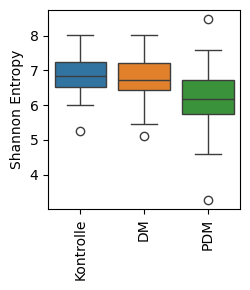

In [148]:
# Remove non-numeric values and convert the column to float
df_clean = metadata_alpha[pd.to_numeric(metadata_alpha["shannon_entropy"], errors="coerce").notnull()].copy()
df_clean["shannon_entropy"] = df_clean["shannon_entropy"].astype(float)
order = ["Kontrolle", "DM", "PDM"]
custom_palette = {
    "Kontrolle": "#1f77b4",  # blue
    "DM": "#ff7f0e",  # orange
    "PDM": "#2ca02c",  # green
}

# Create the boxplot
plt.figure(figsize=(2.6,3))
sns.boxplot(data=df_clean, x="Condition", y="shannon_entropy", palette=custom_palette,  order=order)
plt.xticks(rotation=90)
#sns.stripplot(data=df_clean, x="Condition", y="shannon_entropy", color="black", alpha=0.5, jitter=True)

plt.title("")
plt.xlabel("", rotation=45)
plt.ylabel("Shannon Entropy")
plt.tight_layout()
plt.savefig("alpha_diversity.svg")
plt.show()
